<a href="https://colab.research.google.com/github/Clairekmkim/Clairekmkim/blob/main/Iris%20Dataset%20Analysis%20KNN%20Hyperparameter%20Tuning%20and%20Comparison%20with%20Naive%20Bayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

최적의 K: 1

KNN 모델 (최적 K 사용) 결과:
정확도: 0.9333
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        18
  versicolor       0.82      0.90      0.86        10
   virginica       0.94      0.88      0.91        17

    accuracy                           0.93        45
   macro avg       0.92      0.93      0.92        45
weighted avg       0.94      0.93      0.93        45


나이브 베이즈 모델 결과:
정확도: 0.9556
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        18
  versicolor       0.83      1.00      0.91        10
   virginica       1.00      0.88      0.94        17

    accuracy                           0.96        45
   macro avg       0.94      0.96      0.95        45
weighted avg       0.96      0.96      0.96        45



<ipython-input-9-4be69069de25>:90: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from current font.
  plt.tight_layout()
<ipython-input-9-4be69069de25>:90: UserWarning: Glyph 50883 (\N{HANGUL SYLLABLE US}) missing from current font.
  plt.tight_layout()
<ipython-input-9-4be69069de25>:90: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.
  plt.tight_layout()
<ipython-input-9-4be69069de25>:90: UserWarning: Glyph 51221 (\N{HANGUL SYLLABLE JEONG}) missing from current font.
  plt.tight_layout()
<ipython-input-9-4be69069de25>:90: UserWarning: Glyph 54869 (\N{HANGUL SYLLABLE HWAG}) missing from current font.
  plt.tight_layout()
<ipython-input-9-4be69069de25>:90: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from current font.
  plt.tight_layout()
<ipython-input-9-4be69069de25>:90: UserWarning: Glyph 44050 (\N{HANGUL SYLLABLE GABS}) missing from current font.
  plt.tight_layout()
<ipython-input-9-4be69069de25>:90: UserWarning: Glyph 50640 (\N

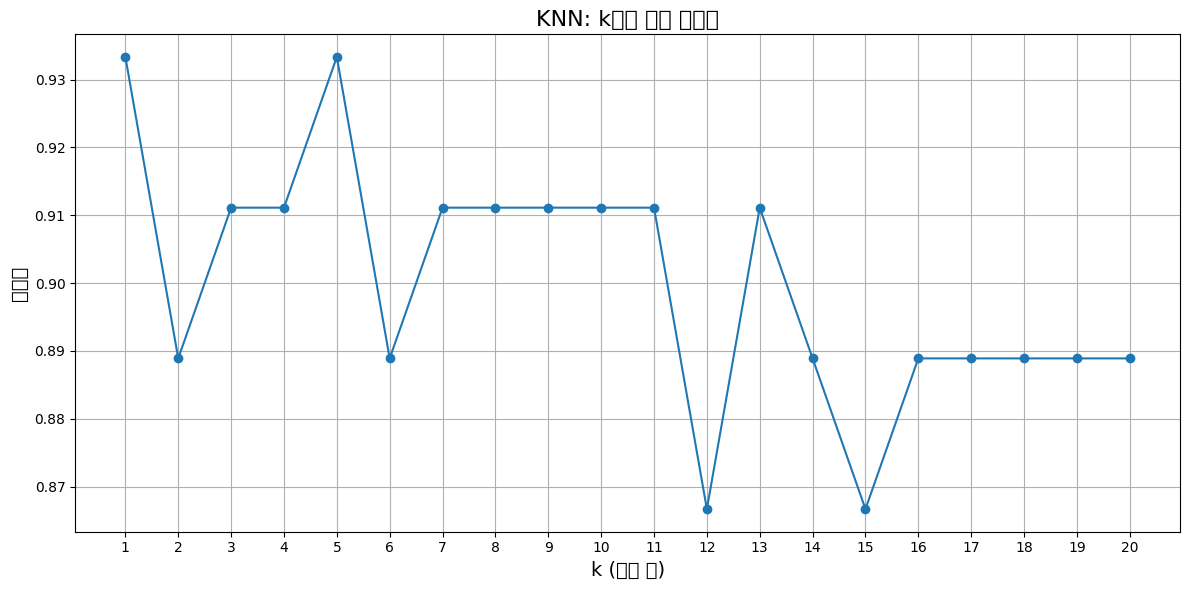

<ipython-input-9-4be69069de25>:98: UserWarning: Glyph 45936 (\N{HANGUL SYLLABLE DE}) missing from current font.
  plt.tight_layout()
<ipython-input-9-4be69069de25>:98: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from current font.
  plt.tight_layout()
<ipython-input-9-4be69069de25>:98: UserWarning: Glyph 53552 (\N{HANGUL SYLLABLE TEO}) missing from current font.
  plt.tight_layout()
<ipython-input-9-4be69069de25>:98: UserWarning: Glyph 49483 (\N{HANGUL SYLLABLE SES}) missing from current font.
  plt.tight_layout()
<ipython-input-9-4be69069de25>:98: UserWarning: Glyph 53945 (\N{HANGUL SYLLABLE TEUG}) missing from current font.
  plt.tight_layout()
<ipython-input-9-4be69069de25>:98: UserWarning: Glyph 49457 (\N{HANGUL SYLLABLE SEONG}) missing from current font.
  plt.tight_layout()
<ipython-input-9-4be69069de25>:98: UserWarning: Glyph 44036 (\N{HANGUL SYLLABLE GAN}) missing from current font.
  plt.tight_layout()
<ipython-input-9-4be69069de25>:98: UserWarning: Glyph 44288 (\

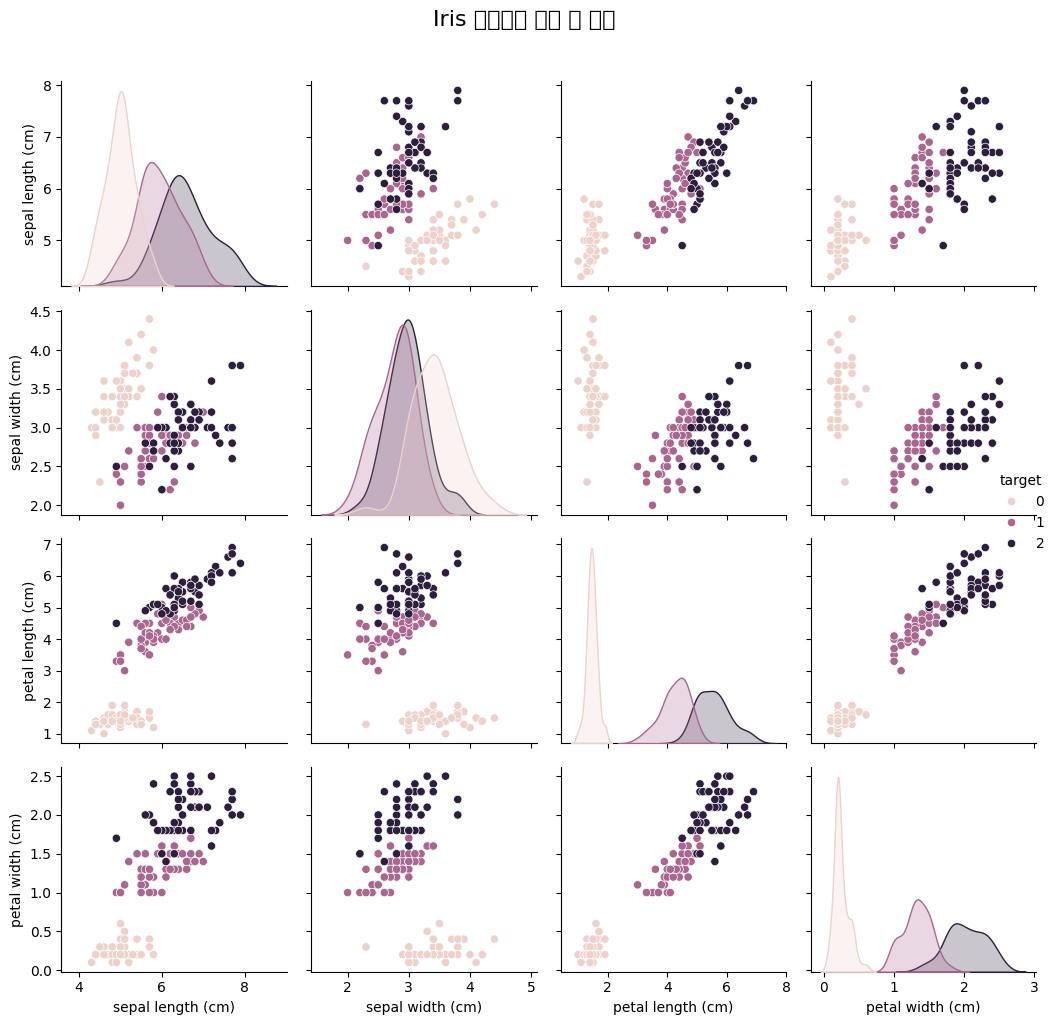

분석 완료


In [9]:
import os
import numpy as np
import pandas as pd
import collections
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# (이전의 한글 폰트 설정 코드는 그대로 유지)

# Iris 데이터셋 로드 및 전처리
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = iris.target

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

# 특성 스케일링
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 한글 폰트 설정
font_list = ['NanumGothic', 'Malgun Gothic', 'AppleGothic', 'Arial Unicode MS']
font_path = None

for font in font_list:
    try:
        font_path = fm.findfont(font)
        if font_path:
            plt.rcParams['font.family'] = font
            break
    except:
        continue

if not font_path:
    print("Warning: 한글 폰트를 찾을 수 없습니다. 일부 텍스트가 깨질 수 있습니다.")

# KNN 모델 하이퍼파라미터 튜닝
k_grid = range(1, 21, 1)
acc_list = []

for k_ in k_grid:
    model = KNeighborsClassifier(n_neighbors=k_)
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    acc = accuracy_score(y_test, y_pred)
    acc_list.append(acc)

# 결과를 DataFrame으로 저장
KnnRes_df = pd.DataFrame({'k': k_grid, 'Accuracy': acc_list})

# 최적의 K 선택
KnnoptimalK = KnnRes_df['k'].iloc[KnnRes_df['Accuracy'].idxmax()]
print(f"최적의 K: {KnnoptimalK}")

# 최종 KNN 모델 학습
knn_model = KNeighborsClassifier(n_neighbors=KnnoptimalK)
knn_model.fit(X_train_scaled, y_train)

# 최종 모델 평가
y_pred = knn_model.predict(X_test_scaled)
print("\nKNN 모델 (최적 K 사용) 결과:")
print(f"정확도: {accuracy_score(y_test, y_pred):.4f}")
print(classification_report(y_test, y_pred, target_names=iris.target_names))

# 나이브 베이즈 모델 (비교를 위해 유지)
nb = GaussianNB()
nb.fit(X_train_scaled, y_train)
nb_pred = nb.predict(X_test_scaled)

print("\n나이브 베이즈 모델 결과:")
print(f"정확도: {accuracy_score(y_test, nb_pred):.4f}")
print(classification_report(y_test, nb_pred, target_names=iris.target_names))

# KNN의 k값에 따른 정확도 시각화
plt.figure(figsize=(12, 6))
plt.plot(k_grid, acc_list, marker='o')
plt.title('KNN: k값에 따른 정확도', fontsize=16)
plt.xlabel('k (이웃 수)', fontsize=14)
plt.ylabel('정확도', fontsize=14)
plt.xticks(k_grid)
plt.grid(True)
plt.tight_layout()
plt.show()

# 특성 간의 관계 시각화
df = X.copy()
df['target'] = y
sns.pairplot(df, hue='target', vars=iris.feature_names)
plt.suptitle("Iris 데이터셋 특성 간 관계", y=1.02, fontsize=16)
plt.tight_layout()
plt.show()

print("분석 완료")